## Feature Matching

1. Using SIFT descriptor and raio test

In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
%pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl (45.3 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\Abir\\anaconda3\\envs\\ai_ml\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [18]:
target_imge = cv2.imread("D:/abir/udemy/computer_vision/data/reeses_puffs.png",0)
large_image = cv2.imread("D:/abir/udemy/computer_vision/data/many_cereals.jpg",0)

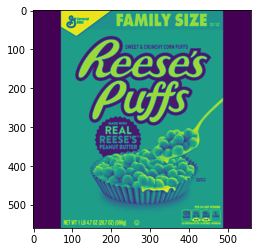

In [19]:
plt.imshow(target_imge)

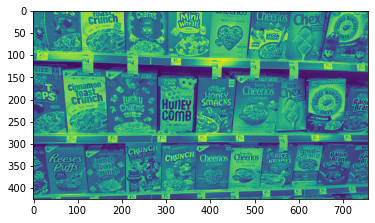

In [20]:
plt.imshow(large_image)

In [21]:
# Create SIFT object
sift = cv2.SIFT_create()

In [22]:
sift

< cv2.SIFT 0000023120F56070>

In [23]:
## find key points and descriptor with sift
kp1,des1 = sift.detectAndCompute(target_imge,None)
kp2,des2 = sift.detectAndCompute(large_image,None)

In [31]:
## Calculate the matches
### Initiate brute force (BF) matcher
bf = cv2.BFMatcher()

### Find the matches using knn
matches = bf.knnMatch(des1,des2,k=2)

In [42]:
## Apply the ratio test.
## Idea is (match1/match2) < 0.75

good = []
for match1,match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [43]:
len(good)

79

In [45]:
## Display
sift_matches = cv2.drawMatchesKnn(target_imge,kp1,large_image,kp2,good,None,flags=2)

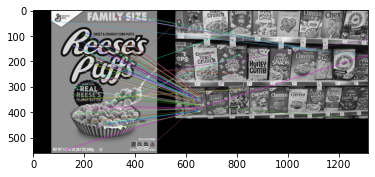

In [48]:
plt.Figure(figsize=[26,8])
plt.imshow(sift_matches)